In [1]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

In [4]:
app = Dash(__name__)

In [12]:
df = pd.read_csv('PR_Monthly-Averages_FINAL.csv')

In [43]:
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')
df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month_name()

In [44]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [45]:
pivot_df = df.pivot(index='month', columns='year', values='MSL')

In [51]:
fig = px.imshow(
    pivot_df,
    text_auto=True,  # Display the values in the heatmap cells
    labels={'x': 'Year', 'y': 'Month', 'color': 'MSL (meters)'},
    title='Monthly Mean Sea Level Across Puerto Rico (2015-2025)'
)

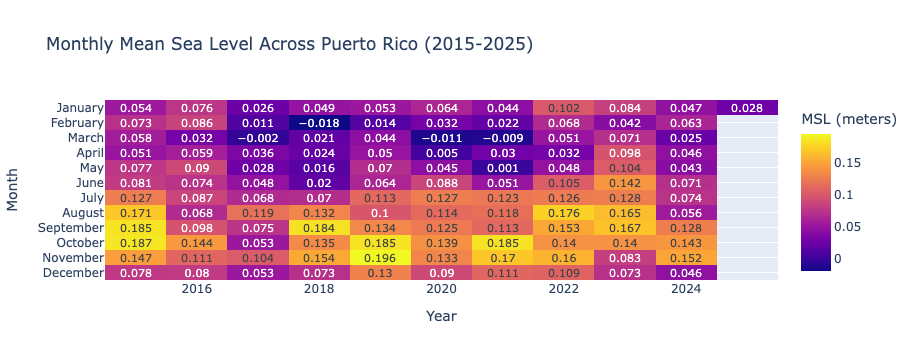

In [52]:
fig.show()

In [53]:
fig.write_html('heatmap_msl_puerto_rico.html')